### CS 125 Assignment

Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Leo Wheeler"
COLLABORATORS = ""

---
---

# Lab 7

Objectives:

- Gain additional experience with File IO (Input/Output)
- Practice filtering data
- String Manipulation with data files
- Creating and Displaying plots using Matplotlib



---


## Created by:
- Michael Stobb
- With collaborators: 
    - None
- Lab7

Remember that you are **encouraged** to collaborate on lab activities – just be sure to: 
1. Document your collaborators and sources.
2. Don’t electronically share the code.
3. Understand what you submit. 


---

## Getting Started

The following readings should be done **before** starting the lab assignment.  Be sure you fully understand what each line is doing and what it means before moving on.  If something doesn't make sense, you should:
1. Try different things (write some code, see what happens)
2. Ask your fellow students on a video chat for assistance
3. Come to office hours or just send an email

### CSV Files

Many data files come as CSV files, ending in a *.csv*, which stands for "comma separated values".  These files often have a "header row" with information about the contents of  each column.  As an example, the following could be the first few lines of a *.csv* file:
>State,Clinton,Trump,Other  
>Arizona,1161167,1252401,159597  
>Colorado,1338870,1202484,238866  
>Florida,4504975,4617886,297178  

Sometimes we end up just ignoring this header file, but we could also save it by doing the following:

In [2]:
fid = open("/srv/data/lab7/2016_pres_election.csv")
header = fid.readline().strip()   # Reads the first line only and strip any newlines!
header

'State,Clinton,Trump,Other'

In [3]:
print(fid.read())

Arizona,1161167,1252401,159597
Colorado,1338870,1202484,238866
Florida,4504975,4617886,297178
Iowa,653669,800983,111379
Maine,357735,335593,54599
Michigan,2268839,2279543,250902
Minnesota,1367716,1322951,254146
Nevada,539260,512058,74067
New Hampshire,348526,345790,49842
North Carolina,2189316,2362631,189617
Ohio,2394164,2841005,261318
Pennsylvania,2926441,2970733,218228
Wisconsin,1382536,1405284,188330
Alabama,729547,1318255,75570
Alaska,116454,163387,38767
Arkansas,380494,684872,65269
California,8753788,4483810,943997
Connecticut,897572,673215,74133
Delaware,235603,185127,20860
District of Columbia,282830,12723,15715
Georgia,1877963,2089104,125306
Hawaii,266891,128847,33199
Idaho,189765,409055,91435
Illinois,3090729,2146015,299680
Indiana,1033126,1557286,144546
Kansas,427005,671018,86379
Kentucky,628854,1202971,92324
Louisiana,780154,1178638,70240
Maryland,1677928,943169,160349
Massachusetts,1995196,1090893,238957
Mississippi,485131,700714,23512
Missouri,1071068,1594511,143026
Montan

Python will read one line at time, but if we want to know the "State" alone, we need to split the data up into
individual values to get the data we care about. We have seen in class that the *split* command creates a list of string values.  To use the split function for these types of files, we need to provide a different **delimeter** character (the separating character) from the default case (which is blank spaces).  This can be done by passing the new delimeter as a parameter to the *split* function.  For *comma separated values*, our delimeter needs to be a single comma (",").  For example, we can say:

In [4]:
fields = header.split(",")
fields

['State', 'Clinton', 'Trump', 'Other']

Because its going to come up again, here's the functions we can use to open and read files, changed a little for this weeks lab.  Make sure you understand what these functions are doing before moving on.

In [ ]:
def write_file(filename):
    outfile = open(filename, "w")

    print("This 1st line goes to the file", file=outfile)
    print("This 2nd line goes to the screen")
    print("This 3rd line goes in the file", file=outfile)
    
    outfile.close()

In [22]:
def read_file():
    infile = open("/srv/data/lab7/2016_pres_election.csv")
    
    header = infile.readline().strip()
    
    for line in infile:
        line = line.strip().split(",")
        print("State: ", line[0])
        
    infile.close()

### Some Interesting Plotting Commands



The plotting library we will be using (matplotlib) can make **many** different types of plots.  One more to add to our growing aresenal is the "bar plot".  Review the commands below to make a bar plot of movie ratings.  Be sure *every line* makes sense before moving on.

In [56]:
import matplotlib.pyplot as plt

In [6]:
datax = [7.4, 8.5, 7.8, 6.2, 7.8, 7.9, 7.2]
datay = ["Black Panther", "Avengers: Infinity War", "Incredibles 2", "Jurassic World: Fallen Kingdom",
         "Deadpool 2", "Mission: Impossible - Fallout", "Ant-Man and the Wasp"]

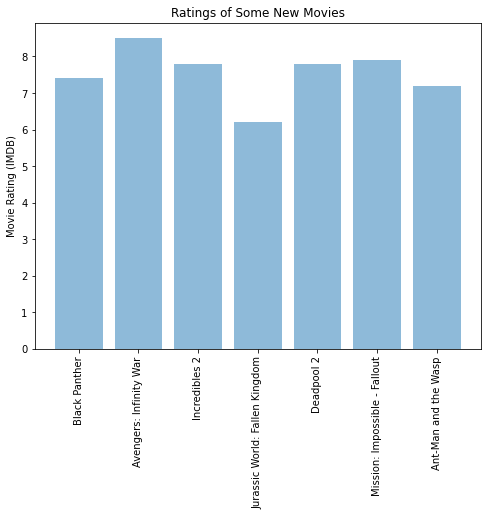

In [7]:
x_axis_locations = range(len(datax))
plt.figure(figsize=(8, 6))
plt.bar(x_axis_locations, datax, align='center', alpha=0.5)
plt.ylabel("Movie Rating (IMDB)")
plt.xticks(x_axis_locations, datay, rotation='vertical')
plt.title("Ratings of Some New Movies")
plt.show()

# Assignment

#### Problem 0

According to popular legend, Dr. Seuss wrote "Green Eggs and Ham" on a bet that he could not write a book with fifty or fewer *distinct* words. The bet was made in 1960 with Bennett Cerf, the co-founder of Random House, and was for $50. Did Dr. Seuss win the bet?!

To answer this question, we need a program that tracks the number of **unique** words. Think carefully about how this might happen:
- Read the file (we already know how to do this)
- Words are separated by spaces (we already know how to deal with this)
- Deal with capitalization variations (what string methods could we use?)
- What happens to punctuation?
- Keep a list of the words that we haven't seen before. 
    - Alternatively, when we haven’t seen a word before, add it to the list.
- After we have looked at the contents of the file, ask how many words are in the list and display the words

It would also be nice if the list were sorted alphabetically.  Even nicer, make the data into a nice bar graph using the code above.  But that's just extra.

The file of the book is stored in "/srv/data/lab7/greeneggs.txt"

In [73]:
def green_eggs_distinct_words():
    greeneggs = open("/srv/data/lab7/greeneggs.txt")
    words = greeneggs.read().upper()
    for sep in ",.:;?!-\n":
        words = words.replace(sep, " ")
    words = words.split()
    words.sort()
    dis_words = []
    for i in words:
        if i not in dis_words:
            dis_words += [i]
            
    print("Here is the list of distinct words:")
    print(dis_words)
    print("There are", len(dis_words), "distinct words in Dr. Suess\' Green Eggs and Ham.")
    greeneggs.close()

In [74]:
green_eggs_distinct_words()

Here is the list of distinct words:
['A', 'AM', 'AND', 'ANYWHERE', 'ARE', 'BE', 'BOAT', 'BOX', 'CAR', 'COULD', 'DARK', 'DO', 'EAT', 'EGGS', 'FOX', 'GOAT', 'GOOD', 'GREEN', 'HAM', 'HERE', 'HOUSE', 'I', 'IF', 'IN', 'LET', 'LIKE', 'MAY', 'ME', 'MOUSE', 'NOT', 'ON', 'OR', 'RAIN', 'SAM', 'SAY', 'SEE', 'SO', 'THANK', 'THAT', 'THE', 'THEM', 'THERE', 'THEY', 'TRAIN', 'TREE', 'TRY', 'WILL', 'WITH', 'WOULD', 'YOU']
There are 50 distinct words in Dr. Suess' Green Eggs and Ham.


In [ ]:
greeneggs = open("/srv/data/lab7/greeneggs.txt")
greeneggs.read()

In [ ]:
help(str)

#### Problem 1

Students in another CS class just took a multiple choice quiz. The file quizAnswers.txt (stored in "/srv/data/lab7/quizAnswers.txt") contains the names of the students and their answers on this 15-question quiz. You should also note that the **first line** contains the correct answers. Your job is to write a program that can *automatically* grade this quiz. Your program should

1. Read the first line of the file (the correct answer) and split it into a list.
2. Look at all the other entries in the list.
    1. Compare the student answers to the correct answer; count how many correct answers they have.
    2. Print the student's name and score to the screen, looking something like the following:
    > Abigail 12  
    > Bruce 13  
    > ...

In [36]:
def quiz_grader():
    answers = open("/srv/data/lab7/quizAnswers.txt")
    correct_ans = answers.readline().strip().split()
    for i in range(20):
        student_ans = answers.readline().strip().split()
        student_score = 0
        x = 0
        for i in range(16):
            if student_ans[x] == correct_ans[x]:
                student_score += 1
                x += 1
            else:
                x += 1
        print(student_ans[0], student_score)

In [37]:
quiz_grader()

Abigail 12
Bruce 13
Cho 11
Darcy 14
Eve 12
Frank 14
Giovanni 13
Hwei 11
Iago 10
Jennifer 13
Kate 12
Lucy 14
Mark 10
Neville 7
Orson 14
Pat 14
Quentin 6
Rachel 12
Stuart 9
Teresa 8


In [27]:
answers = open("/srv/data/lab7/quizAnswers.txt")

for i in range (22):
    correct_ans = answers.readline()
    student_ans = answers.read().strip("\n")
    print(correct_ans, student_ans)

Answers c b b c e c b d b e a e b b e
 Abigail c b b c d c b d b e a e a a e
Bruce c b b c e c b d c c a e b b e
Cho c a b e e c b e b e a a b b e
Darcy c b b c e c b d b c a e b b e
Eve c b b c e e a d a e a e b b e
Frank c b b a e c b d b e a e b b e
Giovanni c a b c e c b d b e a e c b e
Hwei c a a a b c b d b e a e b b e
Iago b b a a e c b d a e a a b b e
Jennifer c b b c e c b d b e a a c b e
Kate c b b c e c b d c e a a b a e
Lucy c b b c e c b d b e a a b b e
Mark c a a c e c b d b a a a b b c
Neville a a e e e a b e c e a d b b e
Orson c b b c e c b d e e a e b b e
Pat c b b c e c b a b e a e b b e
Quentin d d b d d a d d c d a d b b e
Rachel c b b c e a b d c e a e b c e
Stuart a b b c a c a d a e a a b a e
Teresa c b d c d c d d c d a d b d e
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


#### Problem 2

The 2016 Presidential Election between Clinton and Trump shook the United States.  Let's look at the RAW votes, state by state, for each candidate.  The file 2016_pres_election.csv.csv (stored in "/srv/data/lab7/2016_pres_election.csv") contains the certified number of TOTAL votes cast for each candidate for each state.

Your job is to make a plot of this data:
1. Plot the number of votes for each candidate as a bar plot by state (states on bottom axis).  Be sure that both bar plots are on the same plot.

In [8]:
def graph_elec_data_2016():
    import matplotlib.pyplot as plt
    election_data = open("/srv/data/lab7/2016_pres_election.csv")
    header = election_data.readline().strip()
    sl = []
    cl = []
    tl = []
    ol = []

    for line in election_data:
        line = line.strip()
        data = line.split(",")
        sl.append(data[0])
        cl.append(int(data[1]))
        tl.append(int(data[2]))
        ol.append(int(data[3]))
        
    election_data.close()
    
    plt.figure(dpi = 400, figsize = (10,3))
    plt.bar(range(51), cl, alpha = 1, color = "blue", width = .4, align = "edge")
    plt.bar(range(51), tl, alpha = 1, color = "red", width = .4, align = "center")
    plt.bar(range(51), ol, alpha = 1, color = "green", width = -.4, align = "edge")
    plt.xticks(range(51), sl, rotation = 90)
    plt.ylabel("# of Votes (In Millions)")
    plt.xlabel("State")
    plt.title("Votes for each candidate by state")
    plt.legend(["Clinton", "Trump", "Other"])

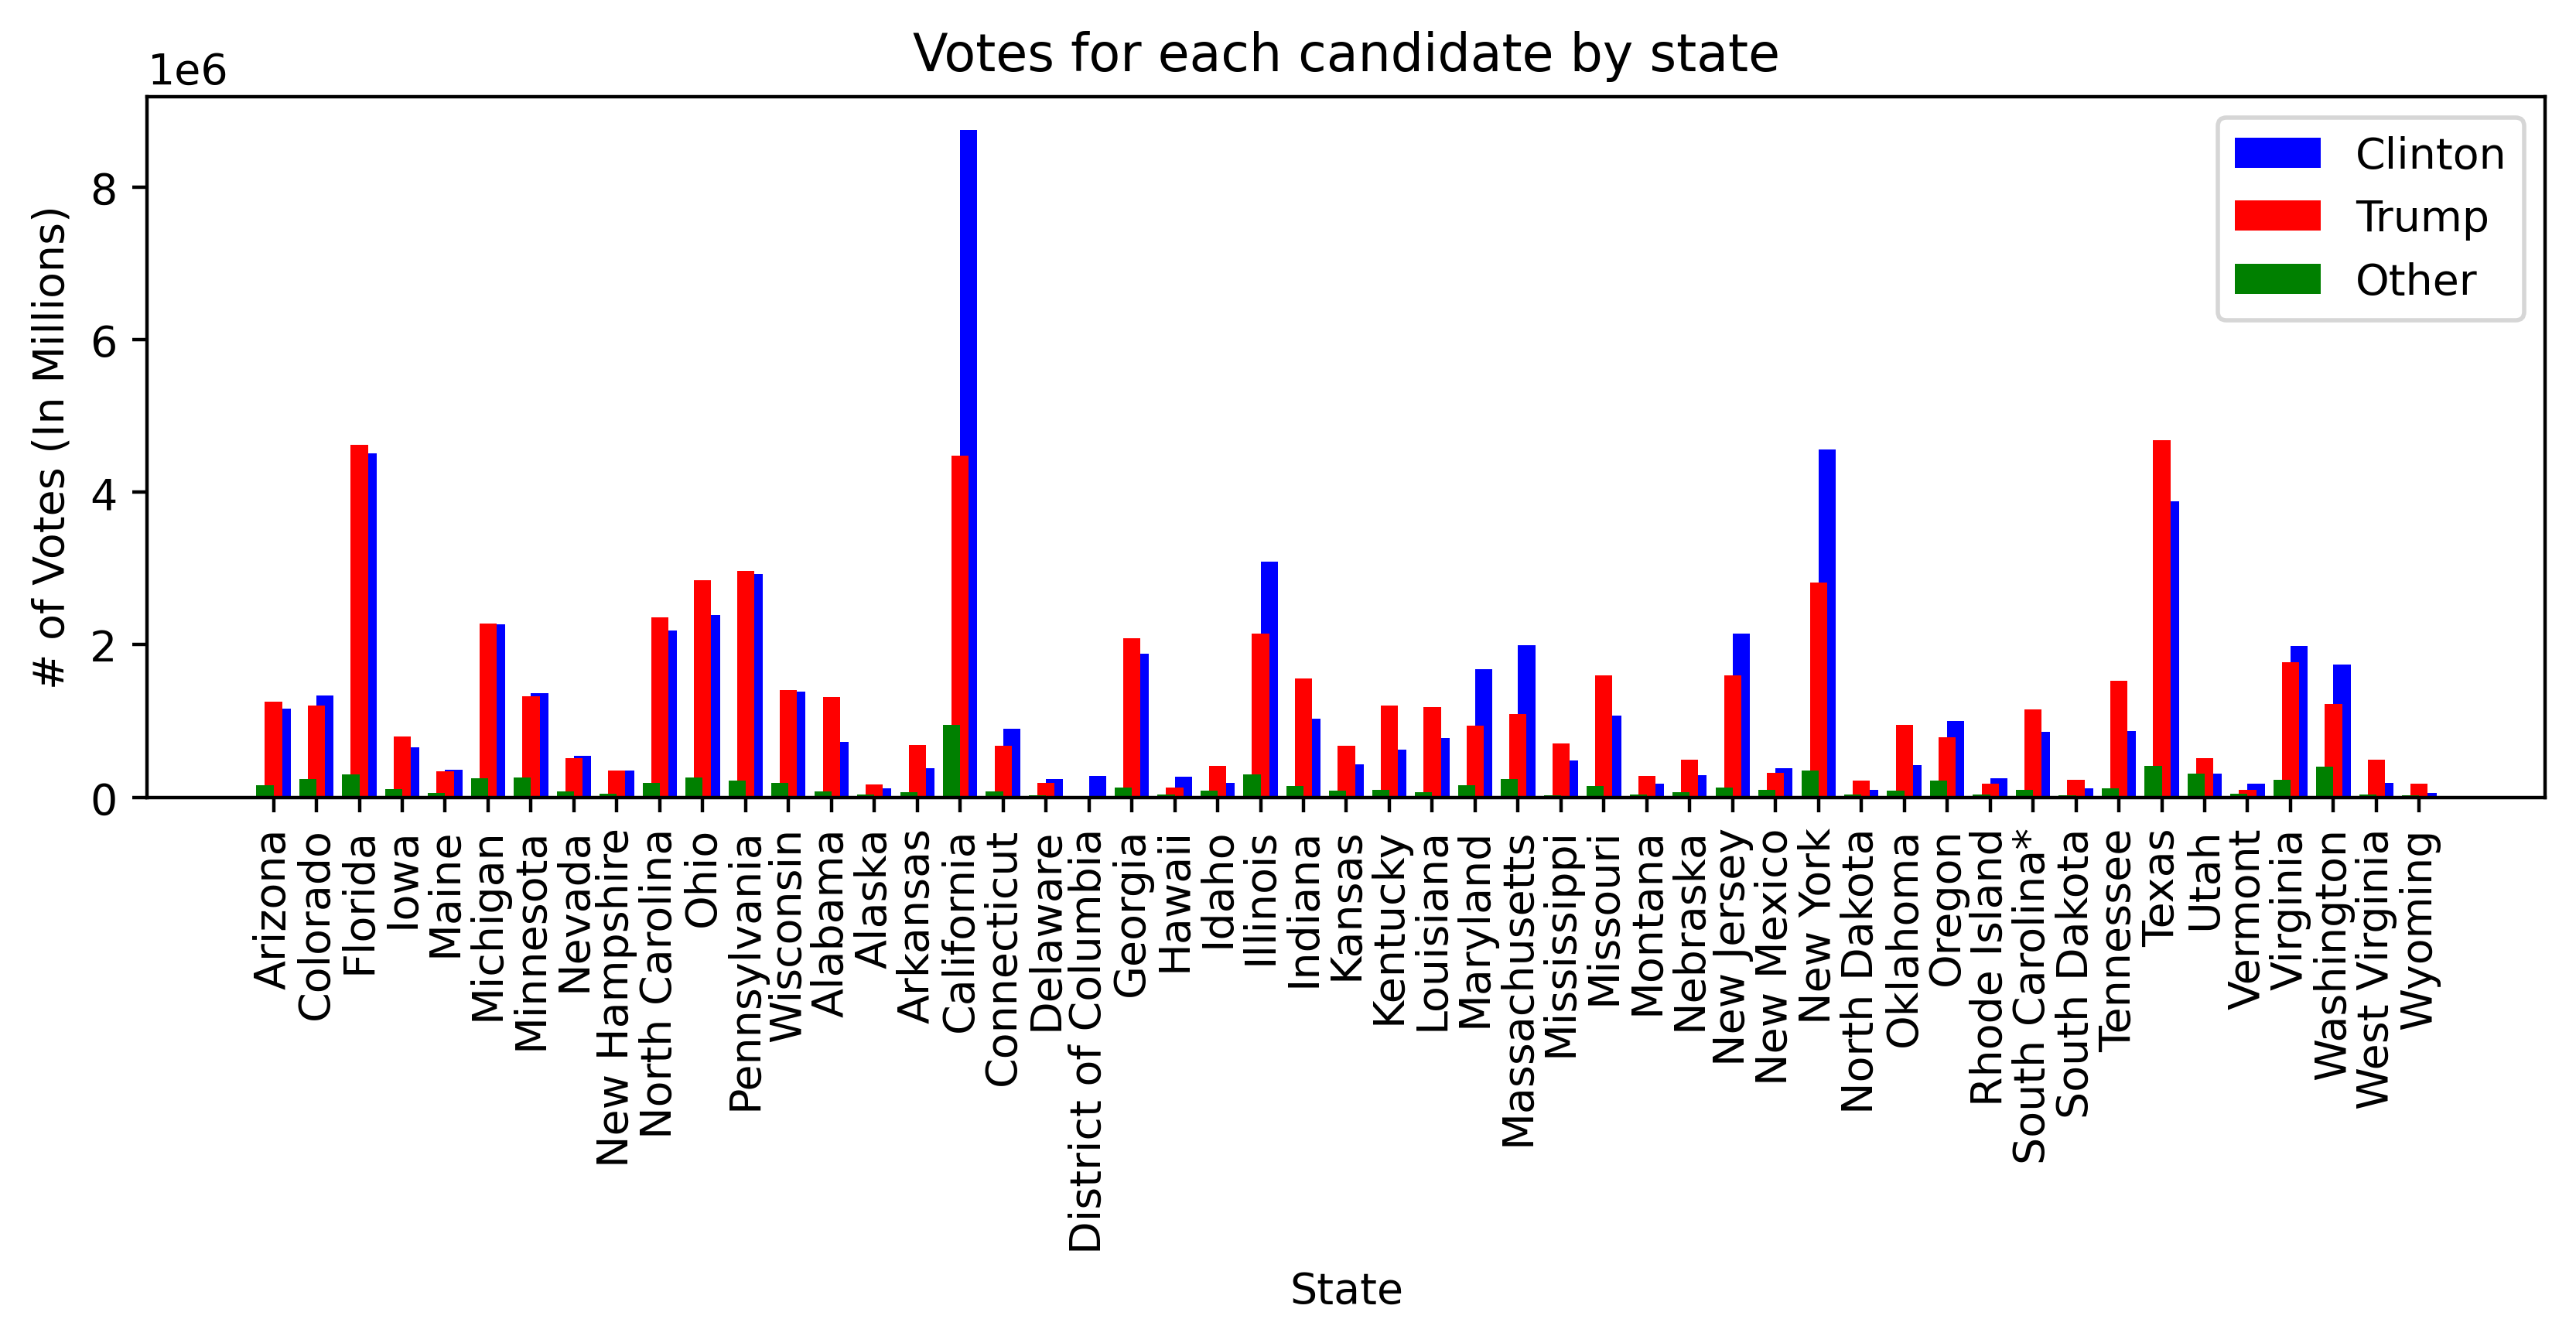

In [9]:
graph_elec_data_2016()